In [6]:
import tensorflow as tf
import keras

from keras.datasets import mnist
from keras.models import Sequential
from keras.models import Model
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Flatten
from keras.optimizers import RMSprop

In [20]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [23]:
img_rows, img_cols = 28, 28
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)


x_train = x_train.astype('float32')
x_test = x_test.astype('float32')


x_train /= 255
x_test /= 255

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

60000 train samples
10000 test samples


In [24]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(2, 2), activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.8))
model.add(Dense(10, activation='softmax'))


# model.add(Dense(64, activation='relu', input_shape=(784,)))
# # Dropout layers remove features and fight overfitting
# model.add(Dropout(0.1))
# model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.1))
# # End with a number of units equal to the number of classes we have for our outcome
# model.add(Dense(10, activation='softmax'))

model.summary()

# Compile the model to put it all together.
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(), metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 27, 27, 32)        160       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 12, 12, 64)        8256      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 1024)              2360320   
_________________________________________________________________
dropout_4 (Dropout)          (None, 1024)              0         
__________

In [25]:
history = model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 98s - loss: 0.2565 - acc: 0.9199 - val_loss: 0.0745 - val_acc: 0.9755
Epoch 2/10
60000/60000 [==============================] - 113s - loss: 0.0913 - acc: 0.9720 - val_loss: 0.0456 - val_acc: 0.9846
Epoch 3/10
60000/60000 [==============================] - 107s - loss: 0.0698 - acc: 0.9790 - val_loss: 0.0418 - val_acc: 0.9846
Epoch 4/10
60000/60000 [==============================] - 108s - loss: 0.0581 - acc: 0.9825 - val_loss: 0.0395 - val_acc: 0.9864
Epoch 5/10
60000/60000 [==============================] - 104s - loss: 0.0510 - acc: 0.9846 - val_loss: 0.0354 - val_acc: 0.9882
Epoch 6/10
60000/60000 [==============================] - 112s - loss: 0.0461 - acc: 0.9858 - val_loss: 0.0320 - val_acc: 0.9900
Epoch 7/10
60000/60000 [==============================] - 149s - loss: 0.0435 - acc: 0.9865 - val_loss: 0.0340 - val_acc: 0.9887
Epoch 8/10
60000/60000 [========================

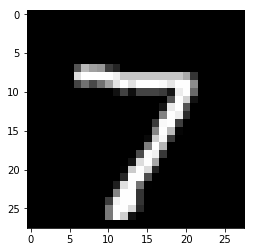

Predicted: 7


In [35]:
import numpy as np
from matplotlib import pyplot as plt


def print_test_image(image_index):
    image = x_test[image_index]
    image = np.array(image, dtype='float')
    pixels = image.reshape((28, 28))
    plt.imshow(pixels, cmap='gray')
    plt.show()

image_index = 0
print_test_image(image_index)
print("Predicted:",np.argmax(model.predict(x_test[image_index].reshape((1,28,28,1)))[0]))